# Figure Generation Instructions

## Description
This document provides instructions for generating figure3.jpg, which illustrates the basic functionality of YOLO. This figure is used to verify that your installation of the repository and dependencies has succeeded.

## Installation and Dependencies
Before proceeding, ensure that you have installed the necessary dependencies and have access to the raw data. Please refer to the [INSTALL.md file](link_to_install_md) for instructions on installing the required software and dependencies.

## Data Preparation
There is no Data Preparation that is needed for this figure.

## Intermediate Data
There is no Intermediate Data that is needed for this figure

## Code


0: 384x640 1 person, 1 bicycle, 1 car, 3 traffic lights, 430.5ms
Speed: 41.5ms preprocess, 430.5ms inference, 61.9ms postprocess per image at shape (1, 3, 384, 640)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x71ec5877b3a0>
Traceback (most recent call last):
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x71eb2357be50>
Traceback (most recent call last):
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/matteo/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

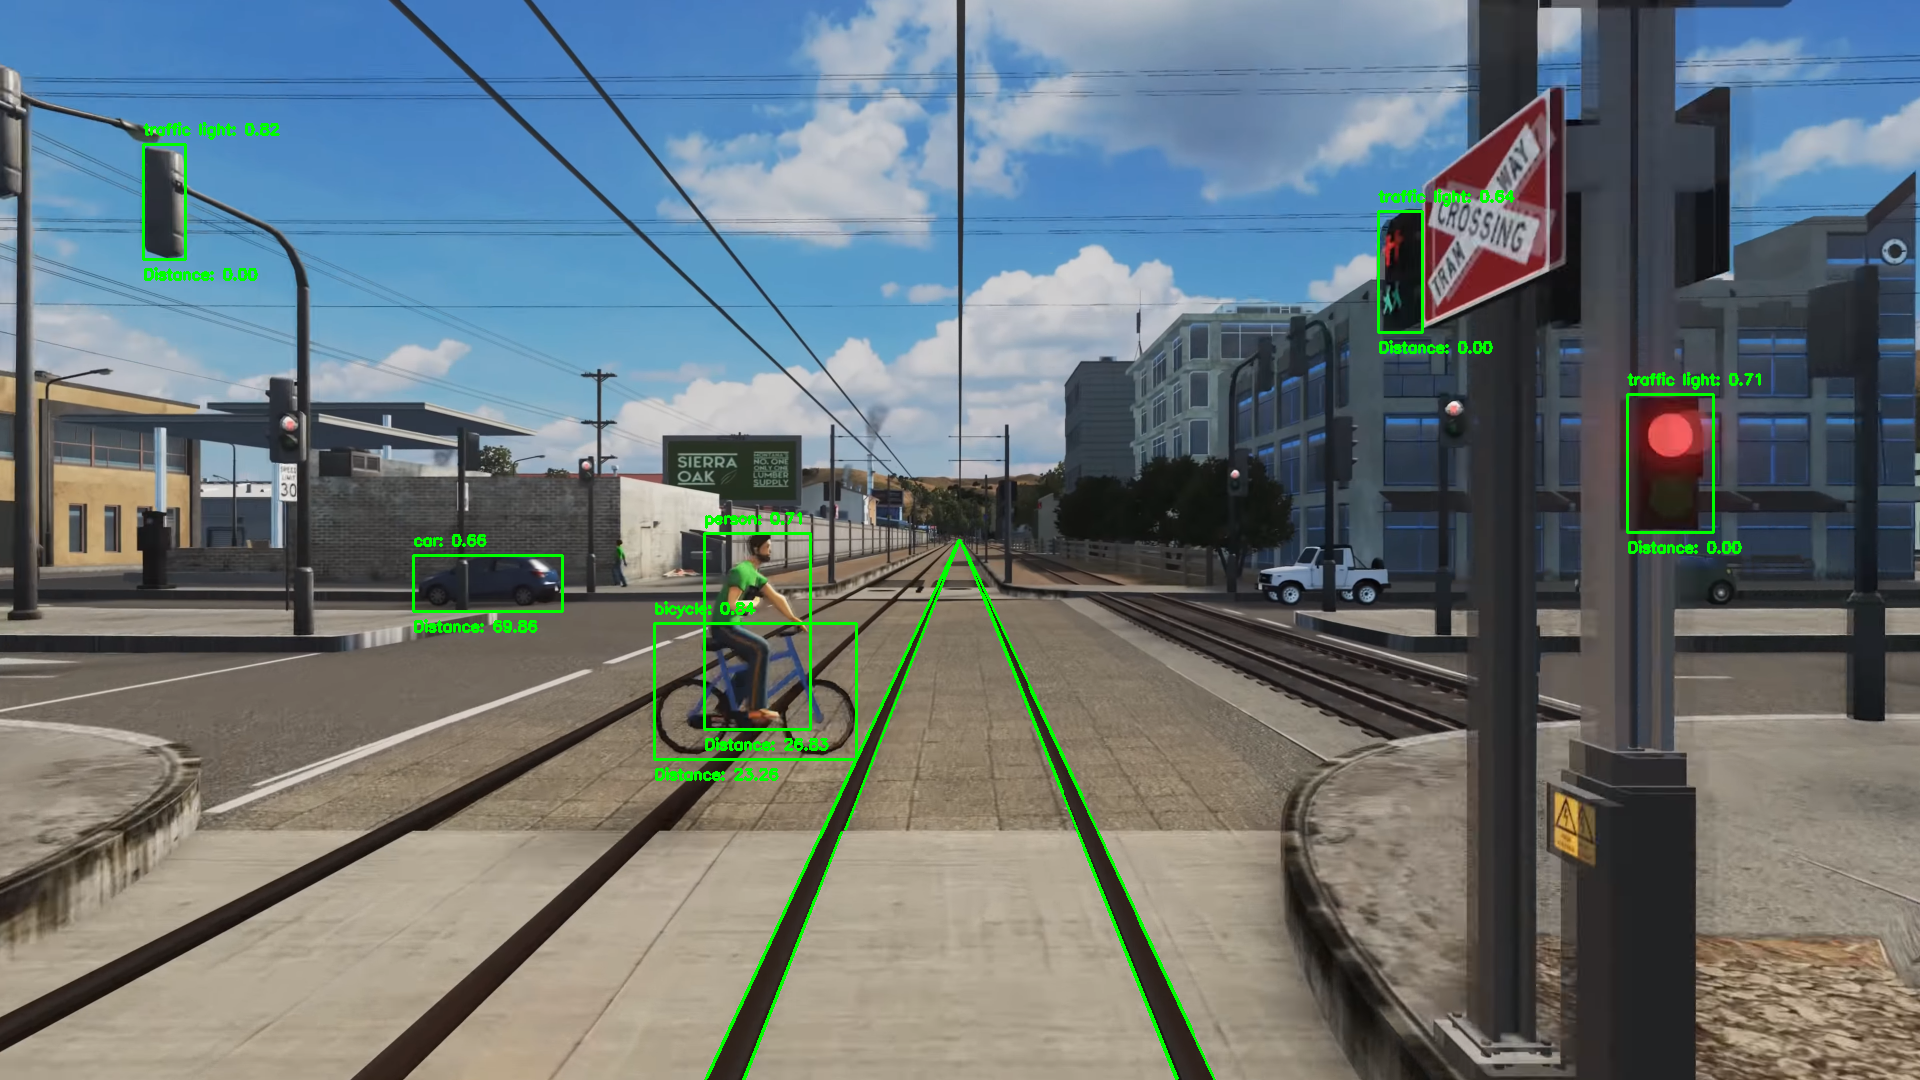

In [1]:
# Import necessary modules
import cv2
import argparse
from run_files.functions.distance_functions import DistanceEstimator
from run_files.functions.hough_functions import LineDetector
from run_files.functions.run_frame import FrameAnalyzer
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

def main(image_path):
    # Build YOLO, detector, and estimator
    yolo_model = YOLO('run_files/models/yolov8n.pt')
    detector = LineDetector()
    estimator = DistanceEstimator()
    fa = FrameAnalyzer(yolo_model, detector, estimator)

    # Load the image
    image = cv2.imread(image_path)

    # Run the frame analyzer on the image
    analyzed_image = fa.run_frame(image, 'run_files/output/csvs/figure2.csv')
    
    # Convert OpenCV image to PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(analyzed_image, cv2.COLOR_BGR2RGB))

    display(pil_image)

if __name__ == '__main__':
    # Call the main function with the specified image path
    main('run_files/inputs/rail_biker.png')